# Packages et Installations

In [1]:
!pip install datasets

!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [2]:
# Importations standard
import os
import re
import html
import unicodedata
from collections import Counter

# Importations scientifiques
import numpy as np
import pandas as pd

# Importations pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Importations pour le traitement du langage naturel (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

# Importations pour les modèles de deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertModel

# Importations pour les datasets
from datasets import load_dataset

# Importations pour le machine learning et l'analyse de données
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from scipy.cluster.hierarchy import linkage, fcluster

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# import umap

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tqdm import tqdm


# Data Upload

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
dataset = load_dataset('imdb')
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# Fusion des ensembles d'entraînement et de test pour analyse
df = pd.concat([train_df, test_df], ignore_index=True)
df_pos = df[df["label"] == 1].sample(1000, random_state=42)
df_neg = df[df["label"] == 0].sample(1000, random_state=42)
df_sample = pd.concat([df_pos, df_neg]).reset_index(drop=True)

# Data Cleaning

In [ ]:
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()

    # Normalisation Unicode et suppression des accents
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

    # Normalisation des répétitions de caractères
    text = re.sub(r'(.)\1+', r'\1', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Suppression des stopwords et des mots très courts
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]

    # Lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [ ]:
# Application du prétraitement au DataFrame
df_sample["cleaned_text"] = df_sample["text"].apply(preprocess_text)

X = df_sample["cleaned_text"]

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    df_sample["label"],
    test_size=0.2,
    random_state=42,
    stratify=df_sample["label"]
)


In [ ]:
print(df_sample["text"].head(3))
print(df_sample["cleaned_text"].head(3))


0    I spent 5 hours drenched in this film. Nothing...
1    I rented Boogie Nights last week and I could t...
2    'Presque Rien' is a beautifully observed portr...
Name: text, dtype: object
0    spent hour drenched film nothing ever sen come...
1    rented bogie night last wek could tel watched ...
2    rien beautifuly observed portrait experience y...
Name: cleaned_text, dtype: object


# Data Analysis

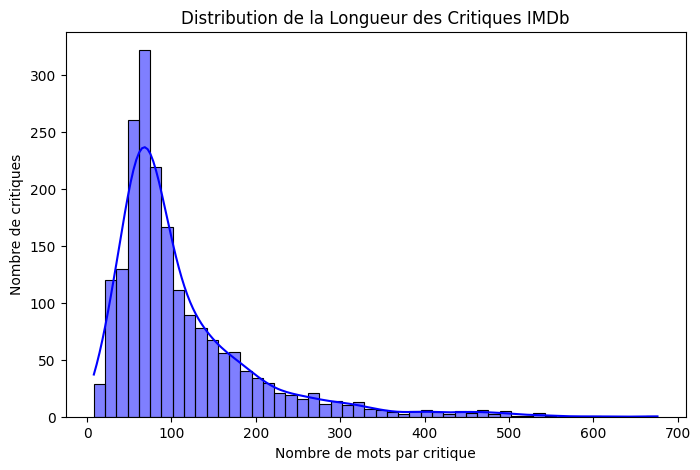

In [ ]:
df_sample["review_length"] = df_sample["cleaned_text"].apply(lambda x: len(x.split()))

# Distribution de la longueur des critiques
plt.figure(figsize=(8, 5))
sns.histplot(df_sample["review_length"], bins=50, kde=True, color="blue")
plt.xlabel("Nombre de mots par critique")
plt.ylabel("Nombre de critiques")
plt.title("Distribution de la Longueur des Critiques IMDb")
plt.show()

**Analysis :** La plupart des avis sont courts, la majorité contenant entre 100 et 200 mots. Très peu d'avis dépassent 1 000 mots. Cette répartition suggère que la plupart des utilisateurs ont tendance à rédiger des avis concis.


**Interpretation :** La distribution de la longueur des avis est importante pour le prétraitement et l'entraînement du modèle. La normalisation de la longueur des avis peut aider le modèle à gérer plus efficacement les avis courts et longs, améliorant ainsi ses performances globales.

<ipython-input-10-fcbe97fcefb9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="review_length", data=df_sample, palette="Set2")


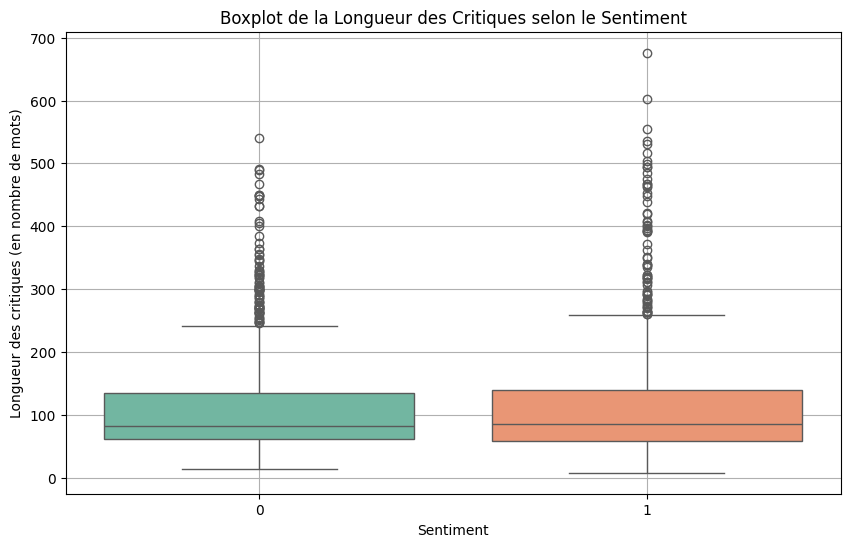

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sample["review_length"] = df_sample["cleaned_text"].apply(lambda x: len(x.split()))

# Boxplot combiné de la longueur des critiques et du sentiment
plt.figure(figsize=(10, 6))

sns.boxplot(x="label", y="review_length", data=df_sample, palette="Set2")

plt.xlabel("Sentiment")
plt.ylabel("Longueur des critiques (en nombre de mots)")
plt.title("Boxplot de la Longueur des Critiques selon le Sentiment")
plt.grid(True)

plt.show()


**Analyse :** Les avis positifs et négatifs présentent des distributions de longueur similaires, sans différence significative de longueur médiane. Cela indique que la longueur des avis n'est pas un indicateur fiable du sentiment.

**Interprétation :** La similitude de la longueur des avis selon le sentiment suggère que le modèle devrait se concentrer davantage sur le contenu et les termes spécifiques utilisés dans les avis plutôt que sur leur longueur. Cette information est précieuse pour la sélection des fonctionnalités et l'entraînement du modèle.

In [ ]:
# Statistiques sur la longueur des critiques
print(df_sample["review_length"].describe())

count    2000.000000
mean      111.897500
std        85.914013
min         8.000000
25%        60.000000
50%        83.000000
75%       136.250000
max       676.000000
Name: review_length, dtype: float64


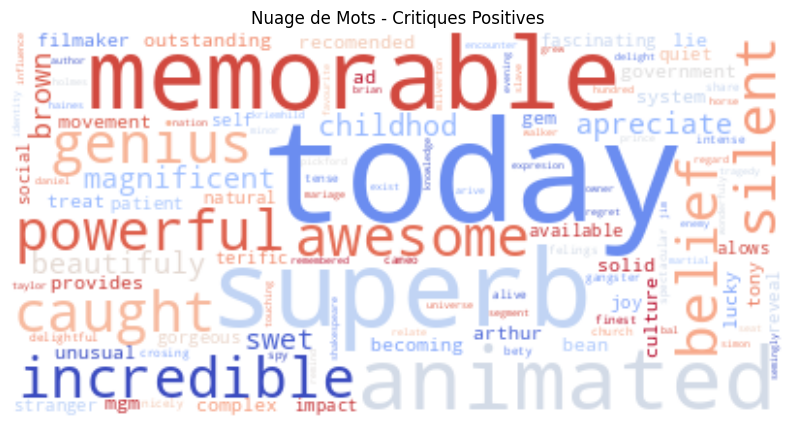

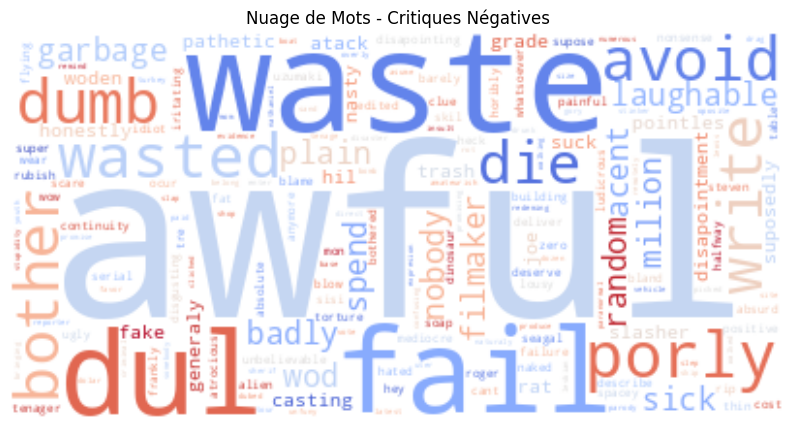

In [ ]:
stop_words2 = set(stopwords.words("english"))
stop_words = set(stopwords.words("english"))

# Fonction pour obtenir les mots fréquents
def get_frequent_words(texts, threshold=10):
    word_counts = Counter(" ".join(texts).split())
    return {word for word, count in word_counts.items() if count > threshold}

positive_texts = df_sample[df_sample["label"] == 1]["cleaned_text"]
negative_texts = df_sample[df_sample["label"] == 0]["cleaned_text"]

frequent_positive_words = get_frequent_words(positive_texts)
frequent_negative_words = get_frequent_words(negative_texts)

# Mots fréquents dans les deux catégories
common_frequent_words = frequent_positive_words & frequent_negative_words

stop_words2.update(common_frequent_words)
stop_words2.add('br')

# Génération des nuages de mots
def generate_wordcloud(texts, title):
    text = " ".join(texts)
    wordcloud = WordCloud(stopwords=stop_words2, background_color="white", colormap="coolwarm", max_words=200).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(positive_texts, "Nuage de Mots - Critiques Positives")
generate_wordcloud(negative_texts, "Nuage de Mots - Critiques Négatives")


**Analyse :** Le nuage de mots met en évidence les termes fréquents dans les avis positifs, tels que « rêve », « oui », « aujourd'hui », « unique » et « chef-d'œuvre ». Ces mots sont révélateurs d'un sentiment positif.

**Interprétation :** L'identification des mots clés positifs permet de comprendre les schémas linguistiques associés aux avis positifs. Cela peut guider l'extraction de caractéristiques et l'entraînement du modèle afin de mieux capter le sentiment positif.

In [ ]:
# Visualisation des n-grams les plus fréquents
def get_most_common_ngrams(texts, n=2, top_k=20):
    ngram_list = []
    for text in texts:
        tokens = [word.lower() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]
        ngram_list.extend(list(ngrams(tokens, n)))
    return Counter(ngram_list).most_common(top_k)

common_bigrams = get_most_common_ngrams(df_sample["cleaned_text"], n=2, top_k=10)
common_trigrams = get_most_common_ngrams(df_sample["cleaned_text"], n=3, top_k=10)

print("Bigrammes les plus fréquents :", common_bigrams)
print("Trigrammes les plus fréquents :", common_trigrams)


Bigrammes les plus fréquents : [(('movie', 'like'), 85), (('special', 'efects'), 81), (('could', 'ben'), 80), (('would', 'ben'), 78), (('even', 'though'), 78), (('movie', 'ever'), 76), (('one', 'best'), 75), (('god', 'movie'), 68), (('main', 'character'), 68), (('waste', 'time'), 67)]
Trigrammes les plus fréquents : [(('worst', 'movie', 'ever'), 39), (('movie', 'ever', 'made'), 20), (('movie', 'ever', 'sen'), 16), (('worst', 'film', 'ever'), 15), (('one', 'worst', 'movie'), 13), (('film', 'ever', 'made'), 11), (('one', 'worst', 'film'), 10), (('make', 'lok', 'like'), 9), (('film', 'ever', 'sen'), 8), (('film', 'would', 'ben'), 8)]


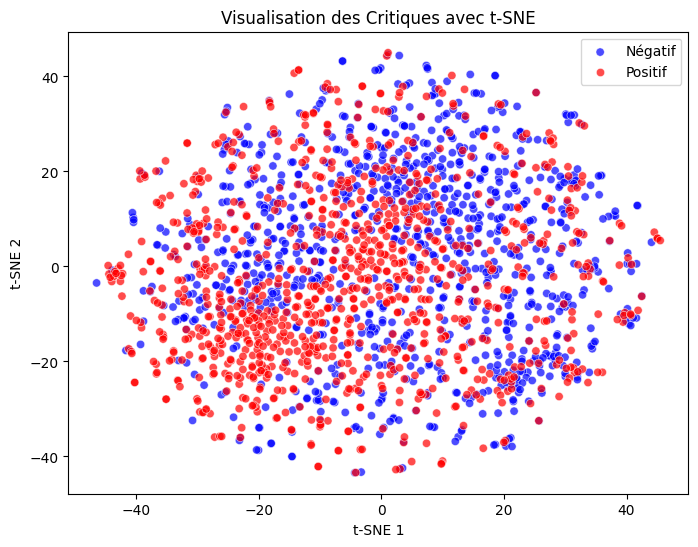

In [ ]:
# TF-IDF Vectorisation pour t-SNE et UMAP
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))  # Unigrams et bigrams
X_tfidf = vectorizer.fit_transform(df_sample["cleaned_text"]).toarray()
y = df_sample["label"].values  # Labels

# Visualisation avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=["red", "blue"], alpha=0.7)
plt.title("Visualisation des Critiques avec t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(["Négatif", "Positif"])
plt.show()


**Analyse :** La projection t-SNE montre une certaine distinction entre les avis positifs et négatifs, mais aussi un chevauchement significatif. Cela indique que si certains avis sont facilement distinguables, d'autres partagent des schémas linguistiques similaires.

**Interprétation :** Le chevauchement dans la projection t-SNE suggère que le modèle pourrait rencontrer des difficultés avec certains avis aux sentiments mitigés ou à l'utilisation d'un langage similaire. Cette information peut guider l'ingénierie des fonctionnalités et l'affinement du modèle.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


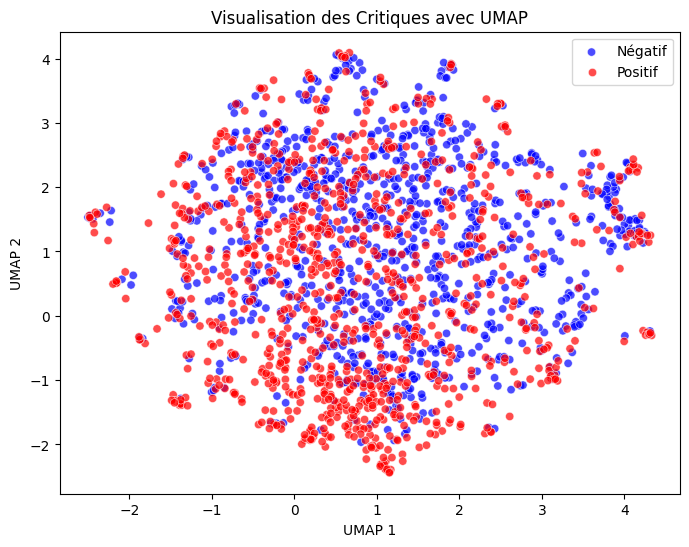

In [ ]:
# 🔹 Visualisation avec UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_tfidf)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette=["red", "blue"], alpha=0.7)
plt.title("Visualisation des Critiques avec UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(["Négatif", "Positif"])
plt.show()

**Analyse :** La projection UMAP révèle une meilleure séparation entre les avis positifs et négatifs par rapport à la projection t-SNE. Cela indique que l'UMAP pourrait être plus efficace pour saisir la structure sous-jacente des données.

**Interprétation :** L'amélioration de la séparation dans la projection UMAP suggère que l'UMAP pourrait être une technique de réduction de dimensionnalité plus adaptée à cet ensemble de données. Cela pourrait améliorer la capacité du modèle à distinguer les sentiments.

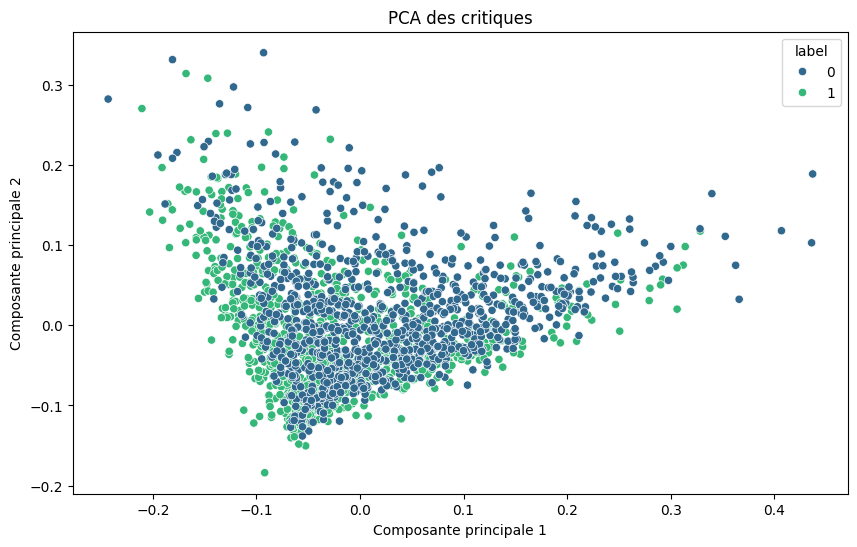

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df_sample['cleaned_text'])

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Visualisation des composantes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_sample['label'][:X_pca.shape[0]], palette='viridis')
plt.title('PCA des critiques')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


**Analyse :** La projection ACP montre une séparation plus linéaire entre les avis positifs et négatifs. Cependant, le chevauchement persiste, ce qui indique que l'ACP pourrait ne pas capturer les relations non linéaires des données aussi efficacement que l'UMAP ou le t-SNE.

**Interprétation :** Bien que l'ACP permette une réduction de dimensionnalité simple, elle n'est peut-être pas la meilleure solution pour cet ensemble de données en raison de sa nature linéaire. Des techniques non linéaires comme l'UMAP ou le t-SNE pourraient être plus appropriées pour capturer les relations complexes des données.

# Modèles

## Modèles basiques

In [42]:
def preprocess_text(text):
    return text.lower().replace(',', '').replace('.', '').replace('!', '')

train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
train_tfidf = tfidf.fit_transform(train_df['text'])
test_tfidf = tfidf.transform(test_df['text'])


from sklearn.decomposition import TruncatedSVD
n_components = 256
svd = TruncatedSVD(n_components=n_components, random_state=42)

train_embeddings = svd.fit_transform(train_tfidf)
test_embeddings = svd.transform(test_tfidf)

train_embeddings.shape, test_embeddings.shape

((25000, 256), (25000, 256))

In [ ]:
y_train = train_df['label']
y_test = test_df['label']

# Scaler pour les modèles qui en ont besoin
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_embeddings)
test_scaled = scaler.transform(test_embeddings)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    # "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    # "MLP (Neural Network)": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
}
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    if name in ["SVM", "KNN", "MLP (Neural Network)", "Logistic Regression"]:
            X_train = train_scaled
            X_test = test_scaled
    else:
        X_train = train_embeddings
        X_test = test_embeddings

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(prec)
    metrics['Recall'].append(rec)
    metrics['F1-score'].append(f1)


results_df = pd.DataFrame(metrics)





🔍 Training Logistic Regression...
Accuracy: 0.8669 | Precision: 0.8669 | Recall: 0.8669 | F1: 0.8669

🔍 Training Random Forest...
Accuracy: 0.7958 | Precision: 0.7959 | Recall: 0.7958 | F1: 0.7957

🔍 Training Gradient Boosting...
Accuracy: 0.8142 | Precision: 0.8142 | Recall: 0.8142 | F1: 0.8142

🔍 Training Decision Tree...
Accuracy: 0.7052 | Precision: 0.7054 | Recall: 0.7052 | F1: 0.7051

🔍 Training KNN...
Accuracy: 0.5900 | Precision: 0.6185 | Recall: 0.5900 | F1: 0.5637

🔍 Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:27:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8318 | Precision: 0.8319 | Recall: 0.8318 | F1: 0.8318

🔍 Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65280
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 256
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.8330 | Precision: 0.8330 | Recall: 0.8330 | F1: 0.8330


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.86688,0.866934,0.86688,0.866875
1,Random Forest,0.79576,0.795852,0.79576,0.795744
2,Gradient Boosting,0.81416,0.814188,0.81416,0.814156
3,Decision Tree,0.70516,0.705376,0.70516,0.705083
4,KNN,0.59000,0.618547,0.59000,0.563736
5,XGBoost,0.83184,0.831850,0.83184,0.831839
6,LightGBM,0.83296,0.832973,0.83296,0.832958


In [ ]:
import plotly.graph_objects as go

models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

fig = go.Figure()

# Add a bar for each metric
for metric in metrics:
    fig.add_trace(go.Bar(
        x=models,
        y=results_df[metric],
        name=metric
    ))

fig.update_layout(
    title="Comparaison des modèles - Métriques de classification",
    xaxis_title="Modèle",
    yaxis_title="Score",
    barmode='group',
    xaxis_tickangle=-45,
    template='plotly_white',
    legend_title="Métrique"
)

fig.show()


## Bert Embedding

### Trainning a MoE of similar Experts on BERT pretrained Embeddings (on a sampled subset of the data )

In [4]:
from tqdm import tqdm


In [5]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

#Batched BERT embedding function
def get_bert_embeddings(texts, tokenizer, model, device, batch_size=32):
    all_embeddings = []
    model.eval()
    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size)):
            batch_texts = texts[i:i + batch_size]
            tokens = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt", max_length=512).to(device)
            outputs = model(**tokens)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS]
            all_embeddings.append(cls_embeddings.cpu())
    return torch.cat(all_embeddings, dim=0)




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [47]:
#Sample a subset from OG dataset
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# train_df_sample = train_df.sample(n=2000, random_state=42).reset_index(drop=True)
# test_df_sample = test_df.sample(n=2000, random_state=42).reset_index(drop=True)


train_embeddings_bert = get_bert_embeddings(train_df['text'].tolist(), tokenizer, model, device)
test_embeddings_bert = get_bert_embeddings(test_df['text'].tolist(), tokenizer, model, device)


100%|██████████| 782/782 [14:05<00:00,  1.08s/it]


In [52]:
#save emmbeddings | load embeddings


torch.save(train_embeddings_bert, 'train_embeddings_bert.pt')
torch.save(test_embeddings_bert, 'test_embeddings_bert.pt')

# Download
from google.colab import files
files.download('train_embeddings_bert.pt')
files.download('test_embeddings_bert.pt')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
class Expert(nn.Module):
    def __init__(self, in_dim, out_dim):
      super().__init__()
      self.fc= nn.Linear(in_dim , out_dim)

    def forward(self, x):
      return F.relu(self.fc(x))


class GatingNet(nn.Module):
    def __init__(self, input_dim, num_experts, hidden_dim=128): #(768, )
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_experts)
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

class MoE(nn.Module):
  def __init__(self, in_dim, num_experts, out_dim):
    super().__init__()
    self.gating= GatingNet(in_dim, num_experts)
    self.experts= nn.ModuleList([Expert(in_dim, out_dim) for _ in range(num_experts)])


  def forward(self, x):
      gate_outputs = self.gating(x)  # Softmax scores for experts
      expert_outputs = torch.stack([expert(x) for expert in self.experts], dim=1)  # (batch, num_experts, out_dim)
      # expert_outputs = torch.stack([expert(x) for expert in self.experts], dim=1)
      # return torch.sum(gate_probs.unsqueeze(-1) * expert_outputs, dim=1)
      # Weighted sum of expert outputs
      final_output = torch.einsum('bi, bij -> bj', gate_outputs, expert_outputs)  # (batch, out_dim) summing over i
      return final_output

In [10]:
#prepare data for training

X_train = train_embeddings_bert
y_train = torch.tensor(train_df_sample["label"].values)

X_test = test_embeddings_bert
y_test = torch.tensor(test_df_sample["label"].values)

batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

input_dim = X_train.shape[1]  # Should be 768 from BERT
num_experts = 4
output_dim = 2

moe_model = MoE(in_dim=input_dim, num_experts=num_experts, out_dim=output_dim)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
moe_model.to(device)

optimizer = torch.optim.Adam(moe_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

In [22]:
#training

def train_moe_model(model, train_loader, test_loader, device, epochs=10, lr=1e-3, show_plot=True):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())

        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}")

    # Plot training loss
    if show_plot:
        plt.figure(figsize=(8, 4))
        plt.plot(range(1, epochs + 1), train_losses, marker='o')
        plt.title('Training Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return model


In [23]:
import time

In [24]:
def evaluate_moe_model(moe, test_loader, device):

    moe.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    test_loss = 0
    start_time = time.time()

    # Inference loop
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = moe(x_batch)
            test_loss += F.cross_entropy(y_pred, y_batch).item()
            _, predicted = torch.max(y_pred, 1)
            probs = F.softmax(y_pred, dim=1)[:, 1]  # Positive class probability
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    end_time = time.time()

    # Compute metrics
    accuracy = sum(p == l for p, l in zip(all_preds, all_labels)) / len(all_labels)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_probs)
    precision_curve, recall_curve, _ = precision_recall_curve(all_labels, all_probs)
    pr_auc = auc(recall_curve, precision_curve)
    test_loss /= len(test_loader)
    inference_time = end_time - start_time
    peak_memory = torch.cuda.max_memory_allocated(device) / 1024**2 if device.type == 'cuda' else 0


    metrics_dict = {
        'Metric': [
            'Accuracy (%)',
            'Precision',
            'Recall',
            'F1 Score',
            'ROC-AUC',
            'PR-AUC',
            'Test Loss',
            'Inference Time (s)',
            'Peak Memory (MB)',
            'Confusion Matrix'
        ],
        'Value': [
            accuracy * 100,  # As percentage
            precision,
            recall,
            f1,
            roc_auc,
            pr_auc,
            test_loss,
            inference_time,
            peak_memory,
            conf_matrix.flatten().tolist()  # [TN, FP, FN, TP]
        ]
    }

    df = pd.DataFrame(metrics_dict)
    return df



Epoch 1: Loss = 0.5730


Epoch 2: Loss = 0.4043


Epoch 3: Loss = 0.3578


Epoch 4: Loss = 0.3492


Epoch 5: Loss = 0.3226


Epoch 6: Loss = 0.2947


Epoch 7: Loss = 0.2998


Epoch 8: Loss = 0.2901


Epoch 9: Loss = 0.2583


Epoch 10: Loss = 0.2611


Epoch 11: Loss = 0.2666


Epoch 12: Loss = 0.2650


Epoch 13: Loss = 0.2274


Epoch 14: Loss = 0.2418


Epoch 15: Loss = 0.2287


Epoch 16: Loss = 0.1948


Epoch 17: Loss = 0.1925


Epoch 18: Loss = 0.1868


Epoch 19: Loss = 0.1721


Epoch 20: Loss = 0.1728


Epoch 21: Loss = 0.1362


Epoch 22: Loss = 0.1369


Epoch 23: Loss = 0.1114


Epoch 24: Loss = 0.1167


Epoch 25: Loss = 0.1344


Epoch 26: Loss = 0.1060


Epoch 27: Loss = 0.0886


Epoch 28: Loss = 0.0779


Epoch 29: Loss = 0.0670


Epoch 30: Loss = 0.0605


Epoch 31: Loss = 0.0469


Epoch 32: Loss = 0.0402


Epoch 33: Loss = 0.0311


Epoch 34: Loss = 0.0261


Epoch 35: Loss = 0.0261


Epoch 36: Loss = 0.0235


Epoch 37: Loss = 0.0216


Epoch 38: Loss = 0.0190


Epoch 39: Loss = 0.0156


Epoch 40: Loss = 0.0113


Epoch 41: Loss = 0.0102


Epoch 42: Loss = 0.0102


Epoch 43: Loss = 0.0087


Epoch 44: Loss = 0.0081


Epoch 45: Loss = 0.0076


Epoch 46: Loss = 0.0075


Epoch 47: Loss = 0.0070


Epoch 48: Loss = 0.0065


Epoch 49: Loss = 0.0061


Epoch 50: Loss = 0.0064


Epoch 51: Loss = 0.0060


Epoch 52: Loss = 0.0049


Epoch 53: Loss = 0.0033


Epoch 54: Loss = 0.0334


Epoch 55: Loss = 0.2154


Epoch 56: Loss = 0.2013


Epoch 57: Loss = 0.0568


Epoch 58: Loss = 0.0251


Epoch 59: Loss = 0.0113


Epoch 60: Loss = 0.0088


Epoch 61: Loss = 0.0059


Epoch 62: Loss = 0.0037


Epoch 63: Loss = 0.0031


Epoch 64: Loss = 0.0024


Epoch 65: Loss = 0.0022


Epoch 66: Loss = 0.0019


Epoch 67: Loss = 0.0018


Epoch 68: Loss = 0.0016


Epoch 69: Loss = 0.0014


Epoch 70: Loss = 0.0013


Epoch 71: Loss = 0.0012


Epoch 72: Loss = 0.0011


Epoch 73: Loss = 0.0010


Epoch 74: Loss = 0.0010


Epoch 75: Loss = 0.0009


Epoch 76: Loss = 0.0009


Epoch 77: Loss = 0.0008


Epoch 78: Loss = 0.0008


Epoch 79: Loss = 0.0007


Epoch 80: Loss = 0.0007


Epoch 81: Loss = 0.0007


Epoch 82: Loss = 0.0006


Epoch 83: Loss = 0.0006


Epoch 84: Loss = 0.0006


Epoch 85: Loss = 0.0005


Epoch 86: Loss = 0.0005


Epoch 87: Loss = 0.0005


Epoch 88: Loss = 0.0005


Epoch 89: Loss = 0.0005


Epoch 90: Loss = 0.0005


Epoch 91: Loss = 0.0004


Epoch 92: Loss = 0.0004


Epoch 93: Loss = 0.0004


Epoch 94: Loss = 0.0004


Epoch 95: Loss = 0.0004


Epoch 96: Loss = 0.0003


Epoch 97: Loss = 0.0003


Epoch 98: Loss = 0.0003


Epoch 99: Loss = 0.0003


Epoch 100: Loss = 0.0003


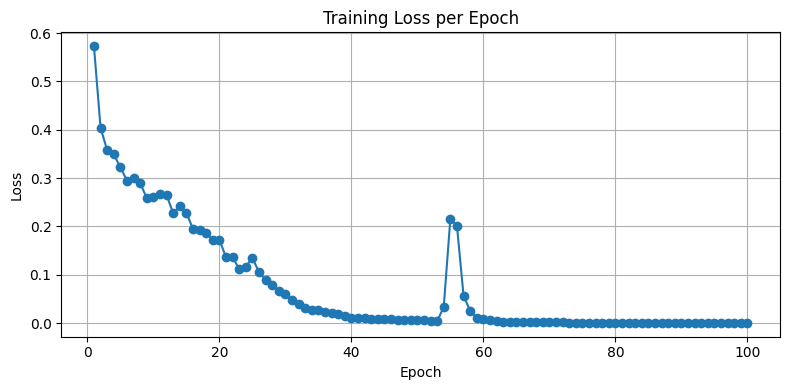

,Metric,Value
0,Accuracy (%),83.45
1,Precision,0.821246
2,Recall,0.8375
3,F1 Score,0.829293
4,ROC-AUC,0.909277
5,PR-AUC,0.890226
6,Test Loss,1.050801
7,Inference Time (s),0.072254
8,Peak Memory (MB),1227.323242
9,Confusion Matrix,"[865, 175, 156, 804]"


In [26]:
moe_model = MoE(in_dim=768, out_dim=2, num_experts=8)
trained_model = train_moe_model(moe_model, train_loader, test_loader, device, epochs=100)


metrics_df = evaluate_moe_model(trained_model, test_loader, device)
metrics_df

### Trainning a top-k MoE of similar Experts | or a Mix of different simple Experts on distilBERT ( a light weight version) pretrained Embeddings on the Whole dataset

In [27]:
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# model = DistilBertModel.from_pretrained('distilbert-base-uncased')
# model.to(device)
# model.eval()

# def get_distilbert_embeddings(texts, tokenizer, model, batch_size=64):
#     embeddings = []
#     for i in range(0, len(texts), batch_size):
#         batch_texts = texts[i:i + batch_size]
#         inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
#         inputs = {key: val.to(device) for key, val in inputs.items()}  # to CUDA..
#         with torch.no_grad():
#             outputs = model(**inputs)
#         cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
#         embeddings.append(cls_embeddings)
#     return np.vstack(embeddings)

# train_embeddings = get_distilbert_embeddings(train_df['text'].tolist(), tokenizer, model)
# test_embeddings = get_distilbert_embeddings(test_df['text'].tolist(), tokenizer, model)
from google.colab import files

train_embeddings_distilbert = torch.load("distil_train_embeddings.pt")
test_embeddings_distilbert = torch.load("distil_test_embeddings.pt")

train_embeddings_distilbert.shape

torch.Size([25000, 768])

In [33]:

class DeepExpert(nn.Module):
    def __init__(self, in_dim=256, hidden_dim=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.net(x)

class ResidualExpert(nn.Module):
    def __init__(self, in_dim=256, hidden_dim=128, out_dim=2):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, out_dim)
        self.relu = nn.ReLU()
        self.out_dim = out_dim


    def forward(self, x):
        out = self.relu(self.fc1(x))
        if out.shape == x.shape:
            out += x  # Residual connection
        return self.fc2(out)

class BatchNormExpert(nn.Module):
    def __init__(self, in_dim=256, hidden_dim=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.net(x)

class DropoutExpert(nn.Module):
    def __init__(self, in_dim=256, hidden_dim=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.net(x)

class TanhExpert(nn.Module):
    def __init__(self, in_dim=256, hidden_dim=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.net(x)

class SineExpert(nn.Module):
    def __init__(self, in_dim=256, hidden_dim=128, out_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.Sigmoid(),  # Or torch.sin manually
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.net(x)


class GatingNet_k(nn.Module):
    def __init__(self, input_dim=768, num_experts=4, hidden_dim=128, noise_scale=1.0):
        super().__init__()
        self.input_dim = input_dim
        self.num_experts = num_experts
        self.noise_scale =  noise_scale
        self.W_g = nn.Linear(self.input_dim, self.num_experts)
        self.W_noise = nn.Linear(self.input_dim,  self.num_experts)

    def forward(self, x, k=4, training = True):
        #compute H(x) from "https://huggingface.co/blog/moe?utm_source=newsletter.armand.so&utm_medium=referral&utm_campaign=understanding-mixture-of-experts#making-moes-go-brrr"

        raw_scores = self.W_g(x)
        if training: #(enable noise only when nn.Module self.traning attribute is set to true)
            noise = torch.randn_like(raw_scores)  # Std Normal with the same shape, device, and dtype
            noise_scale = F.softplus(self.W_noise(x))  # [batch_size, num_experts]
            H = raw_scores + self.noise_scale * noise * noise_scale
        else:
            H = raw_scores
        top_k_values, top_k_indices = H.topk(k, dim=1)  # [batch_size, k]
        #Create a mask: -inf for non-top-k, 0 for top-k
        mask = torch.full_like(H, float('-inf'))
        indices = top_k_indices.unsqueeze(-1).expand(-1, -1, H.size(-1))
        mask.scatter_(1, top_k_indices, 0.0)
        H = torch.where(mask == 0, H, mask)  # KeepTopK


        return F.softmax(H, dim=1)

class MoE(nn.Module):
    def __init__(self, input_dim=768, num_experts=4, expert_hidden_dim=128, num_classes=2):
        super().__init__()
        self.gating_net = GatingNet_k(input_dim, num_experts)
        # self.experts = nn.ModuleList([Expert(input_dim, expert_hidden_dim, num_classes) for _ in range(num_experts)])
        expert_types = [ TanhExpert, DeepExpert, BatchNormExpert, DropoutExpert]
        self.experts = nn.ModuleList([
            expert(input_dim, expert_hidden_dim, num_classes)
            for expert in expert_types
        ])

    def forward(self, x, k=2):
        gating_weights = self.gating_net(x, k, training=self.training)  # [batch_size, num_experts]
        # Only outs for top-k experts
        top_k_weights, top_k_indices = gating_weights.topk(k, dim=1)
        expert_outputs = torch.zeros(x.size(0), k, self.experts[0].net[-1].out_features, device=x.device)
        for i in range(k):
            for batch_idx in range(x.size(0)):
                expert_idx = top_k_indices[batch_idx, i]
                expert_outputs[batch_idx, i] = self.experts[expert_idx](x[batch_idx:batch_idx+1])
        return torch.einsum('bk,bkc->bc', top_k_weights, expert_outputs)

In [53]:
#training :

# X_train = train_embeddings_distilbert
# X_test = test_embeddings_distilbert
X_train = train_embeddings_bert
X_test = test_embeddings_bert


print(train_embeddings.shape, test_embeddings.shape)



X_train = X_train.float()
X_test = X_test.float()

y_train = torch.tensor(train_df["label"].values).long()
y_test = torch.tensor(test_df["label"].values).long()

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Match the input_dim with embedding dim
input_dim = X_train.shape[1]




(25000, 256) (25000, 256)


In [34]:
moe_model = MoE(input_dim=input_dim, num_experts=4, expert_hidden_dim=128, num_classes=2)

trained_model = train_moe_model(moe_model, train_loader, test_loader, device, epochs=20, lr=1e-3)

KeyboardInterrupt: 

In [ ]:
metrics_df = evaluate_moe_model(trained_model, test_loader, device)
metrics_df

### attempt to Analyzing Experts Behavior ...

In [ ]:
#You can patch the missing expert_names dynamically before running the analysis ( E class since i alr trained the model ...;;fy the Mobefore i didnt to modi)

moe_model.expert_names = ['TanhExpert', 'DeepExpert', 'BatchNormExpert', 'DropoutExpert']


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

def analyze_expert_assignments(moe, test_loader, device, plot=True):
    moe.eval()
    all_weights = []
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Gating weights & predictions
            gating_weights = moe.gating_net(x_batch, k=2, training=False)
            y_pred = moe(x_batch, k=2)
            preds = torch.argmax(y_pred, dim=1)

            all_weights.append(gating_weights.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    all_weights = np.vstack(all_weights)
    expert_assignments = np.argmax(all_weights, axis=1)
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    assert len(expert_assignments) == len(all_labels), "Mismatch in lengths!"

    # Expert assignment distribution
    assignment_counts = Counter(expert_assignments)
    print("\n Expert Assignment Distribution:")
    for i, name in enumerate(moe.expert_names):
          print(f"  {name}: {assignment_counts.get(i, 0)} samples")

    # Accuracy per expert
    correctness = all_preds == all_labels
    print("\n Accuracy Per Expert:")
    expert_accuracy = []
    for i in range(moe.gating_net.num_experts):
        mask = (expert_assignments == i)
        if mask.sum() > 0:
            acc = correctness[mask].mean()
            expert_accuracy.append(acc)
            print(f"  {name}: accuracy = {acc:.2f} over {mask.sum()} samples")
        else:
            expert_accuracy.append(None)
            print(f"  Expert {i}: no assignments")


    if plot:
        # assignments
        fig1 = go.Figure()
        fig1.add_trace(go.Bar(
            x=moe.expert_names,
            y=[assignment_counts.get(i, 0) for i in range(moe.gating_net.num_experts)],
            text=[f"{assignment_counts.get(i, 0)} samples" for i in range(moe.gating_net.num_experts)],
            marker=dict(color="skyblue")
        ))
        fig1.update_layout(title="Expert Assignment Distribution",
                           xaxis_title="Expert Index",
                           yaxis_title="Number of Assignments")
        fig1.show()


    return expert_assignments, all_weights, all_labels, all_preds

In [ ]:
assignments, weights, labels, preds = analyze_expert_assignments(moe_model, test_loader, device)


we see that with k=2 , the gating network is biased toward certain experts it's not learning a diverse distribution. which suggest that it doesn't explore a lot ( which defy the purpose of a Mixture, or that the router isn't trained enough

### MoE with Heterogeneous Experts [MLP, CNN, LSTM]

In [44]:
class MLPExpert(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)


class CNNExpert(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.fc = nn.Linear(32 * input_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, D]
        x = self.conv(x)  # [B, 32, D]
        x = x.view(x.size(0), -1)  # flatten
        return self.fc(x)


class LSTMExpert(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Assuming input is [B, D], convert to [B, T=1, D]
        x = x.unsqueeze(1)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])


class TransformerExpert(nn.Module):
    def __init__(self, input_dim, num_heads=4, ff_dim=128, num_layers=1, num_classes=2):
        super().__init__()

        encoder_layer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=ff_dim)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Input: [B, D] → Treat as [B, T=1, D]
        x = x.unsqueeze(1)  # [B, 1, D]
        x = x.permute(1, 0, 2)  # [T=1, B, D] for Transformer
        x = self.transformer(x)  # [1, B, D]
        x = x.squeeze(0)  # [B, D]
        return self.classifier(x)  # [B, num_classes]




class HeterogeneousMoE(nn.Module):
    def __init__(self, input_dim, num_experts=4, expert_hidden_dim=128, num_classes=2):
        super().__init__()

        # (mixing different types)
        self.experts = nn.ModuleList([
    MLPExpert(input_dim, expert_hidden_dim, num_classes),
    CNNExpert(input_dim, num_classes),
    LSTMExpert(input_dim, expert_hidden_dim, num_classes),
    TransformerExpert(input_dim, num_heads=4, ff_dim=128, num_classes=num_classes)  # Transformer added
])

        # Gating network to choose among experts
        self.gate = nn.Sequential(
            nn.Linear(input_dim, num_experts),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
      # Gating network output: [B, num_experts]
      gate_weights = self.gate(x)  # softmax over experts

      expert_outputs = []
      for expert in self.experts:
          out = expert(x)  # Each expert outputs: [B, num_classes]
          expert_outputs.append(out.unsqueeze(1))  # Expand to [B, 1, num_classes]

      # Stack expert outputs along the expert dimension → [B, num_experts, num_classes]
      expert_outputs = torch.cat(expert_outputs, dim=1)

      # Expand gate weights to match expert_outputs for batch matrix multiplication
      gate_weights = gate_weights.unsqueeze(1)  # [B, 1, num_experts]

      # Weighted sum of expert outputs: [B, 1, num_experts] x [B, num_experts, num_classes] → [B, 1, num_classes]
      moe_output = torch.bmm(gate_weights, expert_outputs).squeeze(1)  # Final shape: [B, num_classes]

      return moe_output



In [54]:
Heterogeneous_moe_model = HeterogeneousMoE(input_dim=input_dim)


Epoch 1: Loss = 0.3963


Epoch 2: Loss = 0.3266


Epoch 3: Loss = 0.3132


Epoch 4: Loss = 0.2973


Epoch 5: Loss = 0.2862


Epoch 6: Loss = 0.2754


Epoch 7: Loss = 0.2684


Epoch 8: Loss = 0.2545


Epoch 9: Loss = 0.2424


Epoch 10: Loss = 0.2276


Epoch 11: Loss = 0.2117


Epoch 12: Loss = 0.2040


Epoch 13: Loss = 0.1852


Epoch 14: Loss = 0.1721


Epoch 15: Loss = 0.1576


Epoch 16: Loss = 0.1432


Epoch 17: Loss = 0.1278


Epoch 18: Loss = 0.1148


Epoch 19: Loss = 0.0996


Epoch 20: Loss = 0.0953


Epoch 21: Loss = 0.0776


Epoch 22: Loss = 0.0758


Epoch 23: Loss = 0.0646


Epoch 24: Loss = 0.0489


Epoch 25: Loss = 0.0413


Epoch 26: Loss = 0.0402


Epoch 27: Loss = 0.0296


Epoch 28: Loss = 0.0255


Epoch 29: Loss = 0.0258


Epoch 30: Loss = 0.0219


Epoch 31: Loss = 0.0140


Epoch 32: Loss = 0.0103


Epoch 33: Loss = 0.0090


Epoch 34: Loss = 0.0072


Epoch 35: Loss = 0.0061


Epoch 36: Loss = 0.0056


Epoch 37: Loss = 0.0053


Epoch 38: Loss = 0.0039


Epoch 39: Loss = 0.0031


Epoch 40: Loss = 0.0027


Epoch 41: Loss = 0.0024


Epoch 42: Loss = 0.0023


Epoch 43: Loss = 0.0019


Epoch 44: Loss = 0.0016


Epoch 45: Loss = 0.0017


Epoch 46: Loss = 0.1470


Epoch 47: Loss = 0.0808


Epoch 48: Loss = 0.0417


Epoch 49: Loss = 0.0243


Epoch 50: Loss = 0.0151


Epoch 51: Loss = 0.0105


Epoch 52: Loss = 0.0070


Epoch 53: Loss = 0.0057


Epoch 54: Loss = 0.0045


Epoch 55: Loss = 0.0038


Epoch 56: Loss = 0.0032


Epoch 57: Loss = 0.0029


Epoch 58: Loss = 0.0026


Epoch 59: Loss = 0.0022


Epoch 60: Loss = 0.0020


Epoch 61: Loss = 0.0018


Epoch 62: Loss = 0.0015


Epoch 63: Loss = 0.0014


Epoch 64: Loss = 0.0012


Epoch 65: Loss = 0.0011


Epoch 66: Loss = 0.0010


Epoch 67: Loss = 0.0009


Epoch 68: Loss = 0.0008


Epoch 69: Loss = 0.0007


Epoch 70: Loss = 0.0006


Epoch 71: Loss = 0.0006


Epoch 72: Loss = 0.0005


Epoch 73: Loss = 0.0005


Epoch 74: Loss = 0.0004


Epoch 75: Loss = 0.0004


Epoch 76: Loss = 0.0003


Epoch 77: Loss = 0.0003


Epoch 78: Loss = 0.0003


Epoch 79: Loss = 0.0002


Epoch 80: Loss = 0.0002


Epoch 81: Loss = 0.0002


Epoch 82: Loss = 0.0002


Epoch 83: Loss = 0.0002


Epoch 84: Loss = 0.0001


Epoch 85: Loss = 0.0001


Epoch 86: Loss = 0.0001


Epoch 87: Loss = 0.0001


Epoch 88: Loss = 0.0001


Epoch 89: Loss = 0.0001


Epoch 90: Loss = 0.0001


Epoch 91: Loss = 0.0001


Epoch 92: Loss = 0.0001


Epoch 93: Loss = 0.0001


Epoch 94: Loss = 0.0000


Epoch 95: Loss = 0.0000


Epoch 96: Loss = 0.0000


Epoch 97: Loss = 0.0000


Epoch 98: Loss = 0.0000


Epoch 99: Loss = 0.0000


Epoch 100: Loss = 0.0000


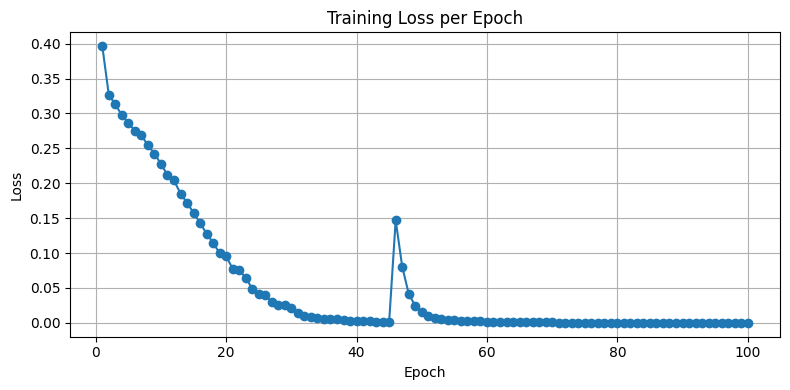

,Metric,Value
0,Accuracy (%),86.512
1,Precision,0.867531
2,Recall,0.86184
3,F1 Score,0.864676
4,ROC-AUC,0.938464
5,PR-AUC,0.939389
6,Test Loss,0.988279
7,Inference Time (s),0.66429
8,Peak Memory (MB),1278.860352
9,Confusion Matrix,"[10855, 1645, 1727, 10773]"


In [55]:
trained_model = train_moe_model(Heterogeneous_moe_model, train_loader, test_loader, device, epochs=100, lr=1e-3)

results_df = evaluate_moe_model(trained_model, test_loader, device)
results_df

## Graphes comparaisons

In [ ]:
class GatingNet(nn.Module):
    def __init__(self, input_dim, num_experts, hidden_dim=128):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_experts)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

class CNNExpert(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(CNNExpert, self).__init__()
        self.conv1 = nn.Conv1d(in_dim, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)
        self.fc = nn.Linear(64, out_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.unsqueeze(1)  # Ajouter une dimension de canal (nécessaire pour le CNN)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(x)  # Appliquer le dropout avant la couche fully connected
        x = self.fc(x)
        return F.relu(x)

class MLPExpert(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MLPExpert, self).__init__()
        self.fc1 = nn.Linear(in_dim, 128)
        self.fc2 = nn.Linear(128, out_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.relu(x)

class Expert(nn.Module):
    def __init__(self, in_dim, out_dim, expert_type="mlp"):
        super(Expert, self).__init__()
        if expert_type == "mlp":
            self.expert = MLPExpert(in_dim, out_dim)
        elif expert_type == "cnn":
            self.expert = CNNExpert(in_dim, out_dim)
        else:
            raise ValueError(f"Unknown expert type: {expert_type}")

    def forward(self, x):
        return self.expert(x)

class MoE(nn.Module):
    def __init__(self, in_dim, num_experts, out_dim):
        super().__init__()
        self.gating = GatingNet(in_dim, num_experts)
        self.experts = nn.ModuleList([Expert(in_dim, out_dim) for _ in range(num_experts)])

    def forward(self, x):
        gate_outputs = self.gating(x)
        expert_outputs = torch.stack([expert(x) for expert in self.experts], dim=1)
        final_output = torch.einsum('bi, bij -> bj', gate_outputs, expert_outputs)
        return final_output

# Prétraitement des données (exemple)
scaler = StandardScaler()
X_train = np.vstack(df_sample["bert_embedding"].values)
X_train_scaled = scaler.fit_transform(X_train)
df_sample["bert_embedding"] = df_sample["text"].apply(get_bert_embedding)

X_test = np.vstack(df_sample["bert_embedding"].values)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train = torch.tensor(df_sample["label"].values, dtype=torch.float32)  # Convertir en float32
y_test = torch.tensor(df_sample["label"].values, dtype=torch.float32)  # Convertir en float32

# Initialiser le modèle MoE avec 5 experts
num_experts = 2
input_dim = 768
output_dim = 1

moe_model = MoE(input_dim, num_experts, output_dim)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train.unsqueeze(1))  # Unsqueeze pour correspondre à la sortie du modèle
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

num_epochs = 50
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(moe_model.parameters(), lr=0.001)

# Entraînement du modèle
moe_model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()

        outputs = moe_model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 10 == 0:  # Afficher tous les 10 epochs
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}")

# Évaluation du modèle sur le jeu de test
moe_model.eval()
with torch.no_grad():
    test_outputs = moe_model(X_test_tensor)
    predictions = torch.sigmoid(test_outputs).squeeze()
    predicted_labels = (predictions > 0.5).long()  # Convertir les probabilités en labels 0/1

# Calcul des métriques
accuracy = accuracy_score(y_test.numpy(), predicted_labels.numpy())
precision = precision_score(y_test.numpy(), predicted_labels.numpy())
recall = recall_score(y_test.numpy(), predicted_labels.numpy())
f1 = f1_score(y_test.numpy(), predicted_labels.numpy())

# Affichage des résultats
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted_labels.numpy())
print("Confusion Matrix:\n", conf_matrix)


torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1, 768])
torch.Size([1

<ipython-input-5-3d02cda500ef>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-5-3d02cda500ef>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-5-3d02cda500ef>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-5-3d02cda500ef>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(models, rotation=45, ha="right")


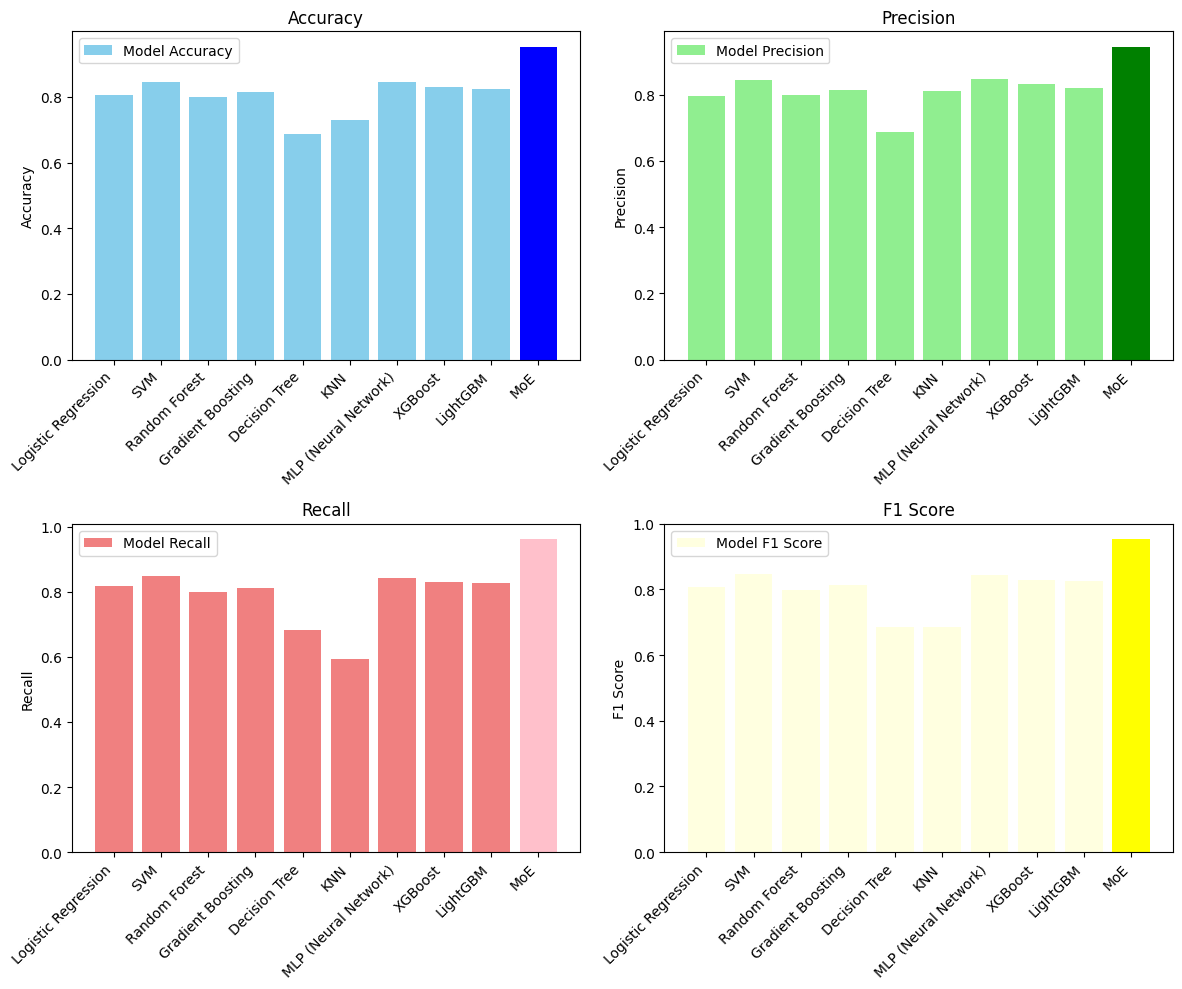

In [ ]:


# Données des modèles
models = [
    "Logistic Regression", "SVM", "Random Forest", "Gradient Boosting",
    "Decision Tree", "KNN", "MLP (Neural Network)", "XGBoost", "LightGBM", "MoE"
]
accuracy = [0.8045, 0.8460, 0.7990, 0.8135, 0.6865, 0.7285, 0.8460, 0.8300, 0.8240, 0.9520]
precision = [0.797199, 0.843905, 0.798525, 0.814552, 0.687485, 0.812110, 0.848065, 0.831384, 0.821444, 0.9440]
recall = [0.817, 0.849, 0.800, 0.812, 0.683, 0.594, 0.843, 0.829, 0.828, 0.9610]
f1_score = [0.806875, 0.846310, 0.799006, 0.813181, 0.684936, 0.686053, 0.845381, 0.829861, 0.824370, 0.9524]

# Définir les couleurs des barres, ici on change la couleur pour "Decision Tree"
colors_accuracy = ['blue' if model == "MoE" else 'skyblue' for model in models]
colors_precision = ['green' if model == "MoE" else 'lightgreen' for model in models]
colors_recall = ['pink' if model == "MoE" else 'lightcoral' for model in models]
colors_f1 = ['yellow' if model == "MoE" else 'lightyellow' for model in models]


# Créer les graphiques
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Graphique de l'Accuracy
axs[0, 0].bar(models, accuracy, color=colors_accuracy, label='Model Accuracy')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_xticklabels(models, rotation=45, ha="right")
axs[0, 0].legend()

# Graphique de la Precision
axs[0, 1].bar(models, precision, color=colors_precision, label='Model Precision')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_xticklabels(models, rotation=45, ha="right")
axs[0, 1].legend()

# Graphique du Recall
axs[1, 0].bar(models, recall, color=colors_recall, label='Model Recall')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_xticklabels(models, rotation=45, ha="right")
axs[1, 0].legend()

# Graphique du F1 Score
axs[1, 1].bar(models, f1_score, color=colors_f1, label='Model F1 Score')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_xticklabels(models, rotation=45, ha="right")
axs[1, 1].legend()

plt.tight_layout()
plt.show()
